Data set :https://www.kaggle.com/shree1992/housedata

### The real estate markets
Property prices are a good indicator of both the overall market condition and the economic health of a country. Present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial.

Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm


Import Data Frame



In [2]:
df = pd.read_csv('data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

There are no data missing values 

### Summary of Data

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Remove unwanted data

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64
(4600, 18)


<AxesSubplot:xlabel='price', ylabel='Count'>

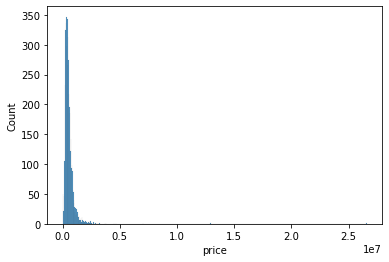

In [6]:
print(df['price'].value_counts())
print(df.shape)
sns.histplot(data=df, x='price')

* Remove outlier from data price

In [7]:
df2 =df[(df['price'] > 0) & (df['price'] < 1000000)]
df2.shape


(4207, 18)

<AxesSubplot:xlabel='price', ylabel='Count'>

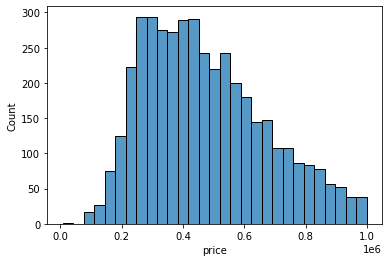

In [8]:
sns.histplot(data=df2, x='price')

* We only need numerical data so, we remove non numerical data

In [9]:
df.drop(columns=['date', 'street', 'city','statezip', 'country'], inplace = True)

### Heat map correlation data

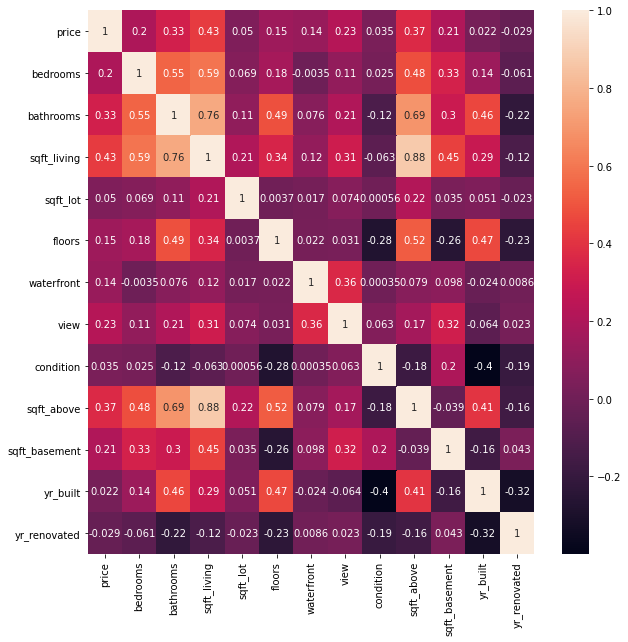

In [10]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

### Heat map correlation data after remove outliers from data price

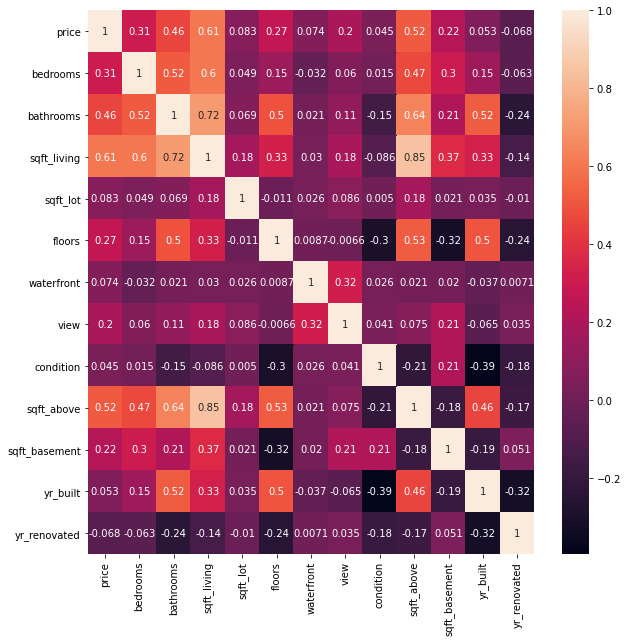

In [11]:
plt.figure(figsize=[10,10])
sns.heatmap(df2.corr(),annot=True)
plt.show()

* Value of sqft_living has highest correltaion to price
* Data yr_renovated has no correlation to price 
* Correlation map has higher number after remove outlier of data price.

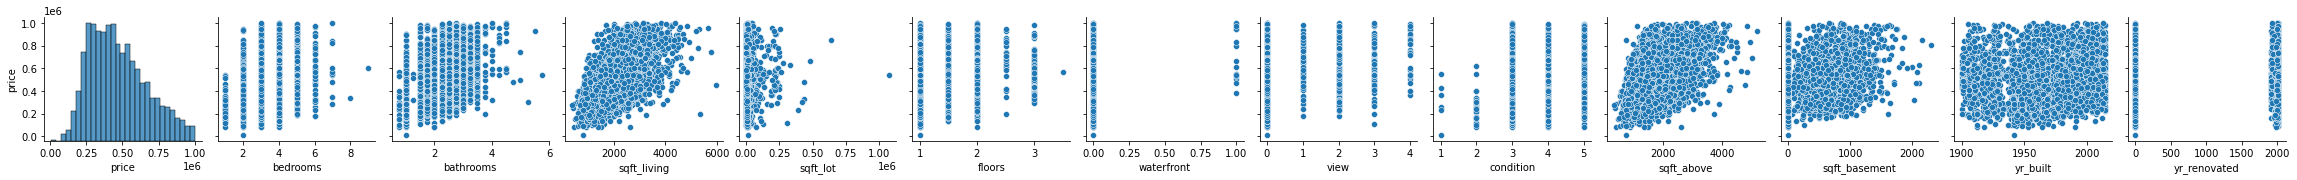

In [12]:
sns.pairplot(df2, y_vars = ['price'])

### Data Visualization

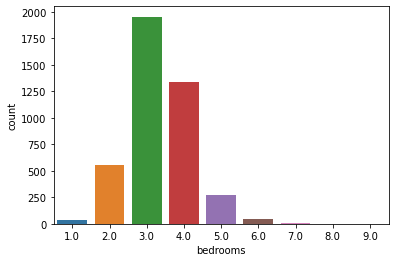

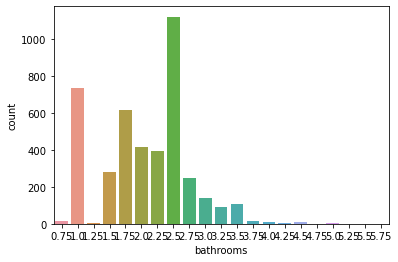

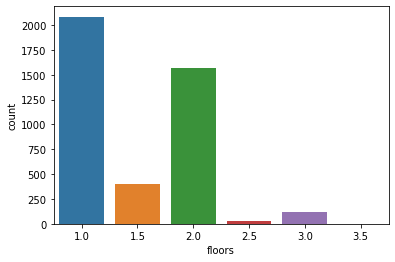

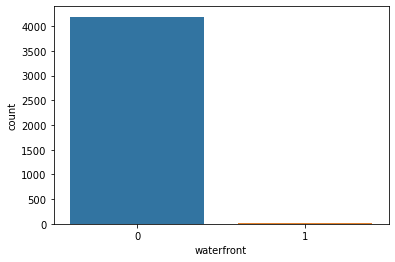

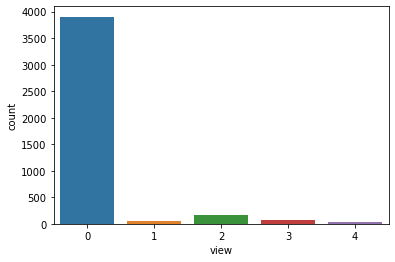

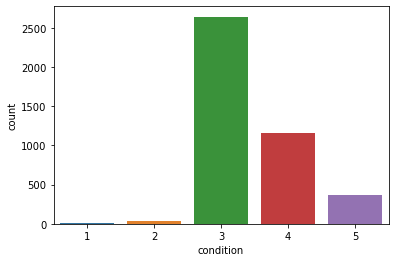

In [13]:
count = ['bedrooms', 'bathrooms', 'floors','waterfront', 'view','condition']
for c in count:
    sns.countplot(x=c, data = df2)
    plt.show()

* We dont need waterfront and view to our  model category due it mostly 0 in total data 

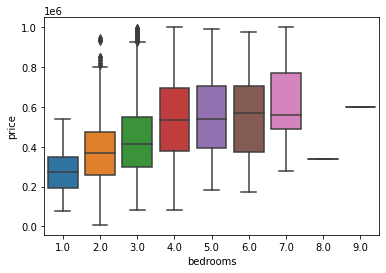

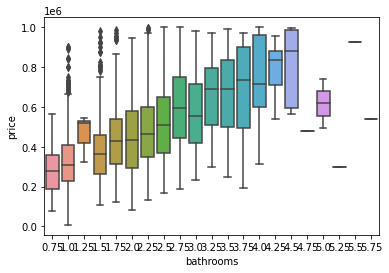

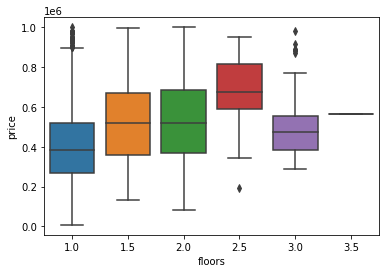

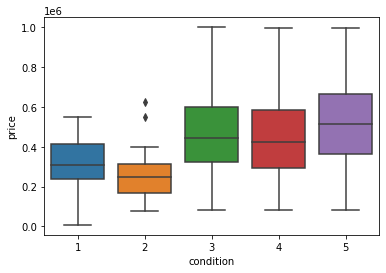

In [14]:
box = ['bedrooms', 'bathrooms', 'floors','condition']
for col in box:
    sns.boxplot(x=col, y='price', data = df2)
    plt.show()

* We have insight more bedrooms, bathrooms and floors, its will higher price.

In [15]:
df2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### Data Pre-processing

In [16]:
category = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']
X = df2[category]
y = df2['price']

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3.0,1.50,1340,7912,1.5,1340,0
2,3.0,2.00,1930,11947,1.0,1930,0
3,3.0,2.25,2000,8030,1.0,1000,1000
4,4.0,2.50,1940,10500,1.0,1140,800
5,2.0,1.00,880,6380,1.0,880,0
...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,1510,0
4596,3.0,2.50,1460,7573,2.0,1460,0
4597,3.0,2.50,3010,7014,2.0,3010,0
4598,4.0,2.00,2090,6630,1.0,1070,1020


### Split the dataset into traning data and test data

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3365, 7)
(842, 7)
(3365,)
(842,)


### Fit Data into Linear Regression model

In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)
r_sq = lr.score(X, y)
print('Coefficient of determination:',r_sq, sep='\n')
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

Coefficient of determination:
0.3830944557381577
intercept: 171923.56391010282
slope: [-2.44978039e+04  6.93557833e+03  1.12237419e+02 -1.14538921e-01
  3.47674831e+04  4.38090212e+01  6.84283974e+01]


## Model of Linear Regression House Price

### y (price) = -24497.8039*(bedrooms) + 6935.5783*(bathrooms) + 112.2374*(sqft_living) - 0.1454*(sqft_lot) 
###                     + 34767.4831*(floors) + 43.81*(sqft_above) + 68.4284*(sqft_basement) + 171923.5639

Mean Squarred Error:
24390537802.216125
Roots Mean Squarred Error:
156174.7028241646


C:\Users\fadli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'y_test vs y-prediction')

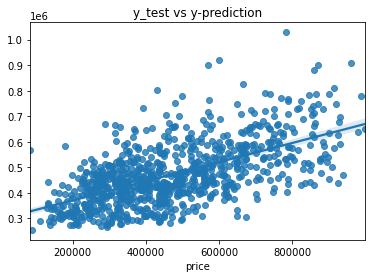

In [19]:
y_pred = lr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squarred Error:', mse, sep='\n')
print('Roots Mean Squarred Error:', rmse, sep='\n')
sns.regplot(y_test, y_pred)
plt.title('y_test vs y-prediction')

* Model only has score 38 %, as we can see from graph variability of data is high. 
*Model is generally considered a weak or low effect size

## Model Deployment